In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from NaiveBayes import GaussNaiveBayes
%matplotlib inline

# Seeds Dataset

In [10]:
# Load the dataset and initialize the Gaussian Naive Bayes objects for our class
# and sklearn
seeds = np.loadtxt('seeds_dataset.txt')
X = seeds[:,:-1]
y = seeds[:,-1]
labels=[1.,2.,3.]
NB = GaussNaiveBayes(labels)
sklNB = GaussianNB()

In [12]:
# Number of testsizes to test
size = 100
# Number of test sets to run for a given test size
testnum = 100
# Array of testsizes
x = np.linspace(0.01, .98, size)

# Initialize the accuracy matrices for our class and the sklearn class
Tests = np.zeros((size, testnum))
sklTests = np.zeros((size, testnum))

# For each test size, find the predictive accuracy for the Gaussian NB classes
# testnum times.
for i in xrange(size):
    for j in xrange(testnum):
        train, test = train_test_split(np.arange(y.size),test_size=x[i])
        Xtr, Xt, ytr, yt = X[train], X[test], y[train], y[test]
        NB.fit(Xtr,ytr)
        sklNB.fit(Xtr, ytr)
        Tests[i,j] = NB.accuracy(Xt, yt)
        sklTests[i,j] = sklNB.score(Xt, yt)

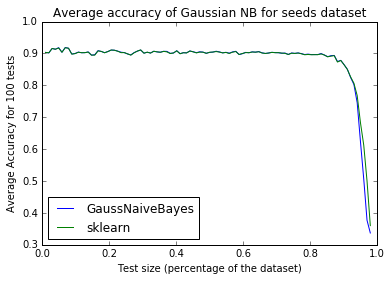

In [23]:
# Plot for the average accuracy of the Gaussian NB for the seeds dataset
plt.plot(x, Tests.mean(axis=1), label="GaussNaiveBayes")
plt.plot(x, sklTests.mean(axis=1), label="sklearn")
plt.xlabel('Test size (percentage of the dataset)')
plt.ylabel('Average Accuracy for '+ str(testnum)+ ' tests')
plt.title('Average accuracy of Gaussian NB for seeds dataset')
plt.legend(loc='best')
plt.savefig('AvAccSeeds.png')
plt.show()


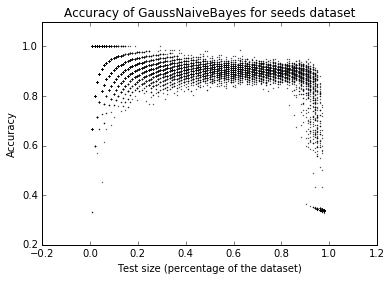

In [14]:
# Plot for the accuracy of each test of the personal version of Gaussian NB 
# for the seeds dataset
scatterx = (x * np.ones_like(Tests).T).T.ravel()
scatterT = Tests.ravel()
plt.scatter(scatterx, scatterT, s=.1)
#plt.plot(x, Tests.mean(axis=1))
plt.xlabel('Test size (percentage of the dataset)')
plt.ylabel('Accuracy')
plt.title('Accuracy of GaussNaiveBayes for seeds dataset')
plt.savefig('AccSeeds.png')
plt.show()


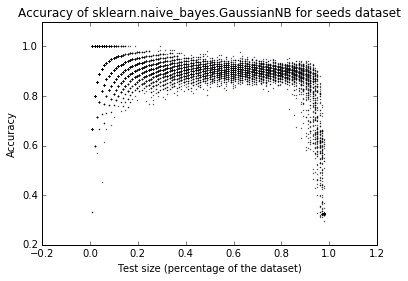

In [15]:

# Plot for the accuracy of each test of the sklearn Gaussian NB for the seeds dataset
scatterx = (x * np.ones_like(Tests).T).T.ravel()
plt.scatter(scatterx, sklTests.ravel(), s=.1, c='b')
#plt.plot(x, Tests.mean(axis=1))
plt.xlabel('Test size (percentage of the dataset)')
plt.ylabel('Accuracy')
plt.title('Accuracy of sklearn.naive_bayes.GaussianNB for seeds dataset')
plt.savefig('SklAccSeeds.png')
plt.show()

In [17]:
train, test = train_test_split(np.arange(y.size),test_size=.2)
Xtr, Xt, ytr, yt = X[train], X[test], y[train], y[test]
NB.fit(Xtr,ytr)
sklNB.fit(Xtr, ytr)

GaussianNB()

In [18]:
%%timeit
p1 = NB.predict(Xt)


10000 loops, best of 3: 41.8 µs per loop


In [19]:
%%timeit
p2 = sklNB.predict(Xt)

10000 loops, best of 3: 112 µs per loop


In [20]:
%%timeit
NB.fit(Xtr,ytr)

10000 loops, best of 3: 192 µs per loop


In [22]:
%%timeit
sklNB.fit(Xtr,ytr)

1000 loops, best of 3: 381 µs per loop
